In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation

from timeit import default_timer as timer

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
day = UNITS.day
km = UNITS.kilometer
rad = UNITS.radian


#parameters first pendulum
params1 = Params(mass = 1 * kg, #Mass of pend. 1
                g = -9.8 * m / (s**2),
                v_init = 0 * rad/s, #for both pendulums
                length = .8*m, #length of pend. 1
                length_ratio = .5,#ratio of the top portion of the pendulum to the bottom portion
                length_above_table = .2 * m,
                theta_init = np.deg2rad(15) * rad, #in Degrees converts to radians
                damping_factor = .003);#over time, the pendulum slows down, this is that constant

#parameters second pendulum
params2 = Params(mass = 1 * kg, #Mass of pend. 1
                g = -9.8 * m / (s**2),
                v_init = 0 * rad/s, #for both pendulums
                length = .7 * m, #length of pend. 1
                length_ratio = .5, #ratio of the top portion of the pendulum to the bottom portion
                theta_init = np.deg2rad(15) * rad, #in Degrees converts to radians
                damping_factor = .003) #over time, the pendulum slows down, this is that constant

#parameters third pendulum
params3 = Params(mass = 1 * kg, #Mass of pend. 1
                g = -9.8 * m / (s**2),
                v_init = 0 * rad/s, #for both pendulums
                length = .8 * m, #length of pend. 1
                length_ratio = .5, #ratio of the top portion of the pendulum to the bottom portion
                theta_init = np.deg2rad(15) * rad, #in Degrees converts to radians
                damping_factor = .003) #over time, the pendulum slows down, this is that constant


def make_system(params):
    """Makes a System object for the given conditions.
    params: Params object
    returns: System object
    """
    mass = params.mass
    length = params.length
    g = params.g
    v_init = params.v_init
    theta_init = params.theta_init
    
    init = State(theta=theta_init, v=v_init)
     
    t_end = (3*60) * s
    dt = t_end / (100*1*60)
    
    return System(params, init=init, t_end=t_end, dt=dt)

#creating a system
system1 = make_system(params1);
system2 = make_system(params2);
system3 = make_system(params3);

#define slope function for pend. 1
def slope_func1(state, t, system1):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of r and v
    """
    theta, v = state
    mass, g = system1.mass, system1.g
    length = params1.length
    damping_factor = params1.damping_factor
    
    if (v < 0):
        direction = -1
    else:
        direction = 1
    
    f_g1 = (g * (np.sin(theta))/length)*mass * rad
    fdrag1 = -((damping_factor*(v*abs(v))))*mass*(1/rad)
    fdrag_roll1 = ((((((mass*g)*(.0005)*(direction))/mass))*mass*((rad)/((m))))) 
    fpen1 = (((.005*.04*g)*direction)*mass*(rad/m))
    
    
    dtheta1dt = ((v)/length) * m
    dv1dt = (f_g1 + fdrag1 + fdrag_roll1+fpen1)/mass
    
    return dtheta1dt, dv1dt


#define slope function for pend. 2
def slope_func2(state, t, system2):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of r and v
    """
    theta, v = state
    mass, g = system2.mass, system2.g
    length = params2.length
    damping_factor = params2.damping_factor
    
    if (v < 0):
        direction = -1
    else:
        direction = 1
    
    f_g2 = (g * (np.sin(theta))/length)*mass * rad
    fdrag2 = -((damping_factor*(v*abs(v))))*mass*(1/rad)
    fdrag_roll2 = ((((((mass*g)*(.0005)*(direction))/mass))*mass*((rad)/((m))))) 
    fpen2 = (((.005*.04*g)*direction)*mass*(rad/m))
    
    
    dtheta2dt = ((v)/length) * m
    dv2dt = (f_g2 + fdrag2 + fdrag_roll2+fpen2)/mass
    
    return dtheta2dt, dv2dt


#define slope function for pend. 3
def slope_func3(state, t, system3):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of r and v
    """
    theta, v = state
    mass, g = system3.mass, system3.g
    length = params3.length
    damping_factor = params3.damping_factor
    
    if (v < 0):
        direction = -1
    else:
        direction = 1
    
    f_g3 = (g * (np.sin(theta))/length)*mass * rad
    fdrag3 = -((damping_factor*(v*abs(v))))*mass*(1/rad)
    fdrag_roll3 = ((((((mass*g)*(.0005)*(direction))/mass))*mass*((rad)/((m))))) 
    fpen3 = (((.005*.04*g)*direction)*mass*(rad/m))
    
    
    dtheta3dt = ((v)/length) * m
    dv3dt = (f_g3 + fdrag3 + fdrag_roll3+fpen3)/mass
    
    return dtheta3dt, dv3dt


def event_func1(state, t, system1):
    """Return the distance between the surface of the earth and surface of the sun.
    """
    theta, v = state
    if t > 5*60 *s:
            return v
    else:
        return abs(v)
    
def event_func2(state, t, system2):
    """Return the distance between the surface of the earth and surface of the sun.
    """
    theta, v = state
    if t > 5*60 *s:
        return v
    else:
        return abs(v)

def event_func3(state, t, system2):
    """Return the distance between the surface of the earth and surface of the sun.
    """
    theta, v = state
    if t > 5*60 *s:
        return v
    else:
        return abs(v)

In [3]:
def plot_trace3(system1, system2, system3):
    sineFunction = np.vectorize(np.sin)

    length_1 = params1.length
    length_2 = params2.length
    length_3 = params3.length
    length_above_table = params1.length_above_table

    results1["sintheta"] = sineFunction(results1["theta"])
    results1["linpos"] = results1["sintheta"] * length_above_table

    results2["sintheta"] = sineFunction(results2["theta"])
    results2["linpos"] = results2["sintheta"] * length_above_table
    
    results3["sintheta"] = sineFunction(results3["theta"])
    results3["linpos"] = results3["sintheta"] * length_above_table

    x_motion = results1.linpos+results3.linpos
    y_motion = results2.linpos+results3.linpos
    
    fig = plt.figure(figsize=(15, 15))
    plot(x_motion, y_motion)
    decorate(xlabel='x position',
             ylabel='y position')


Saving figure to file 3pendulum5.png
66.8839494


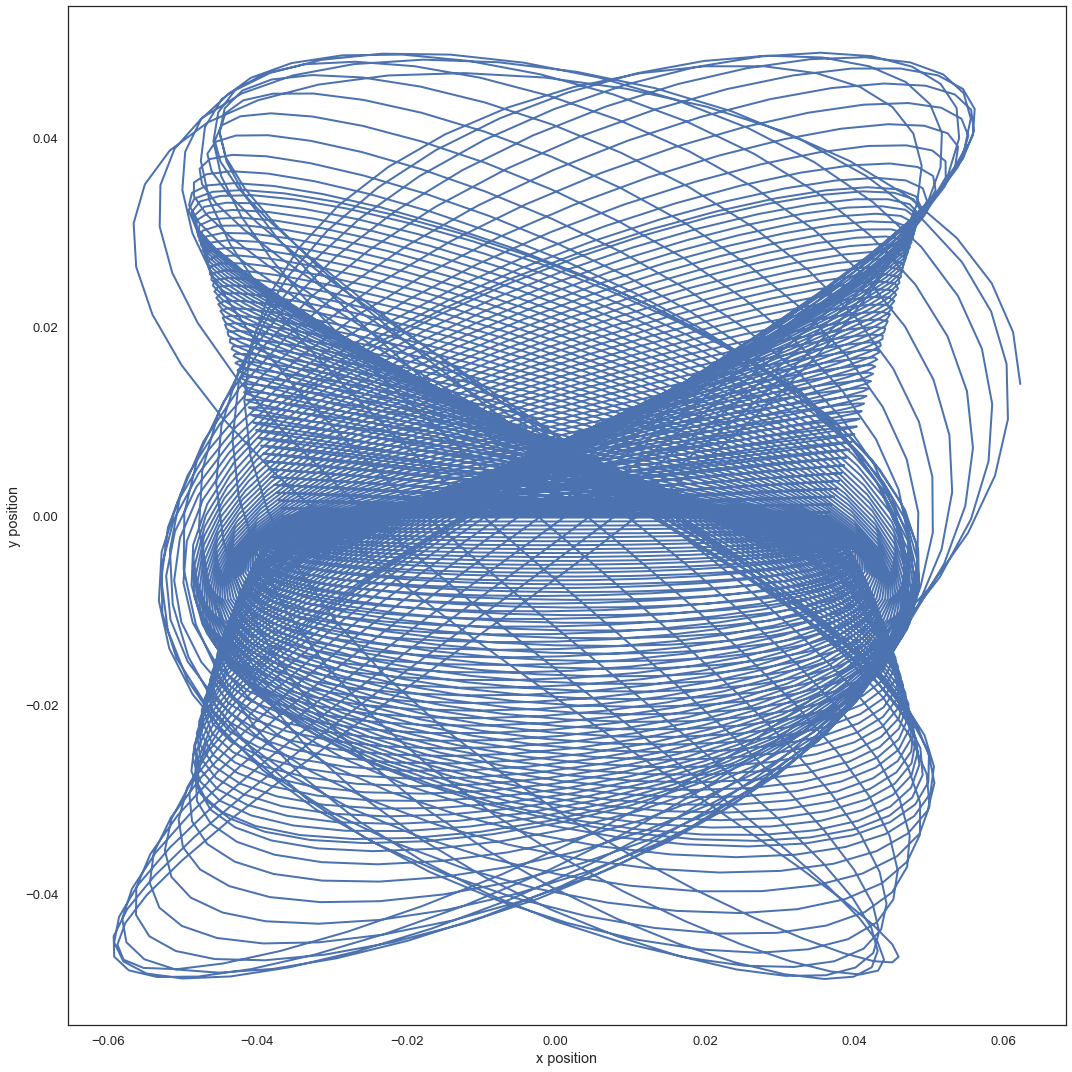

In [4]:
start = timer()
params1.length = .5 *m
params1.v_init = 0 * rad/s
params1.theta_init = np.deg2rad(15) * rad

params2.length = .75*m
params2.v_init = .7 * rad/s
params2.theta_init = np.deg2rad(1) * rad

params3.length = .77 *m
params3.v_init = 0 * rad/s
params3.theta_init = np.deg2rad(3) * rad

system1 = make_system(params1);
system2 = make_system(params2);
system3 = make_system(params3);

results1, details = run_ode_solver(system1, slope_func1, events=event_func1)
results2, details = run_ode_solver(system2, slope_func2, events=event_func2)
results3, details = run_ode_solver(system3, slope_func3, events=event_func3)
plot_trace3(system1, system2, system3)
savefig('3pendulum5.png') #saves plot
end = timer()
print(end - start)

In [ ]:
start = timer()
Results_Combined = pd.DataFrame()
x_motion = results1.linpos+results3.linpos
y_motion = results2.linpos+results3.linpos
Results_Combined["posx"] = x_motion.astype(str).str.strip('dimensionless meter').str.strip().astype(float)
Results_Combined["posy"] = y_motion.astype(str).str.strip('dimensionless meter').str.strip().astype(float)

plot_test = Results_Combined.iloc[::5];
frames_to_use = len(plot_test)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800) #bitrate doesn't seem to affect time

fig = plt.figure(figsize=(20,20))
plt.xlim(-.08, .08)
plt.ylim(-.08, .08)
plt.xlabel('X Direction',fontsize=20)
plt.ylabel('Y Direction',fontsize=20)
plt.title('Animation of Motion',fontsize=40)

def animate(i):
    plot_test1 = plot_test.iloc[:int(i+1)] #select data range
    p = plot(np.array(plot_test1.posx), np.array(plot_test1.posy), color='b', linewidth=.2)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=frames_to_use, repeat=False)
ani.save('Testy3.mp4', writer=writer)
end = timer()
print(end - start)

In [ ]:
len(results1)/5/20

In [10]:
2349/60

39.15